In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

#**Outliers**

## **What is an outlier?**
-  In statistics, an outlier is an observation point that is distant from other observations.

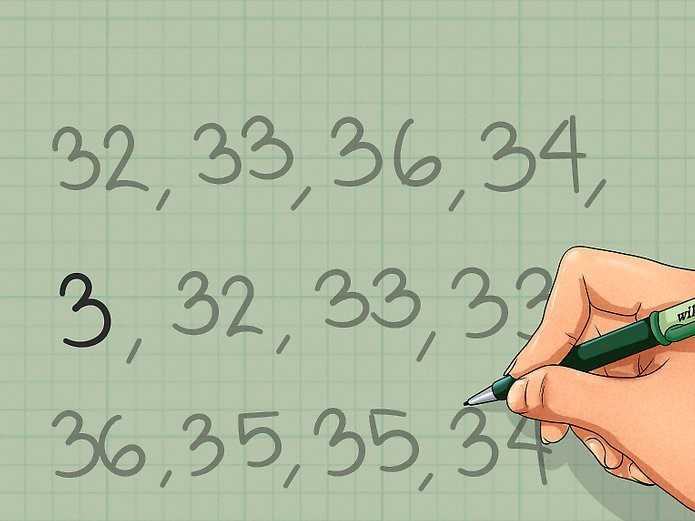

Outliers can have many causes, such as:
- Measurement or input error.
- Data corruption.
- True outlier observation.

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data. This does not mean that the values identified are outliers and should be removed. A good tip is to consider plotting the identified outlier values, perhaps in the context of non-outlier values to see if there are any systematic relationships or patterns to the outliers. If there is, perhaps they are not outliers and can be explained, or perhaps the outliers themselves can be identified more systematically.

There are two types of outliers:
1. Univariate outliers
2. Multivariate outliers

Univariate outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

Let us understand this with an example. Let us say we are understanding the relationship between height and weight. Below, we have univariate and bivariate distribution for Height, Weight. Take a look at the box plot. We do not have any outlier (above and below 1.5*IQR, most common method). Now look at the scatter plot. Here, we have two values below and one above the average in a specific segment of weight and height

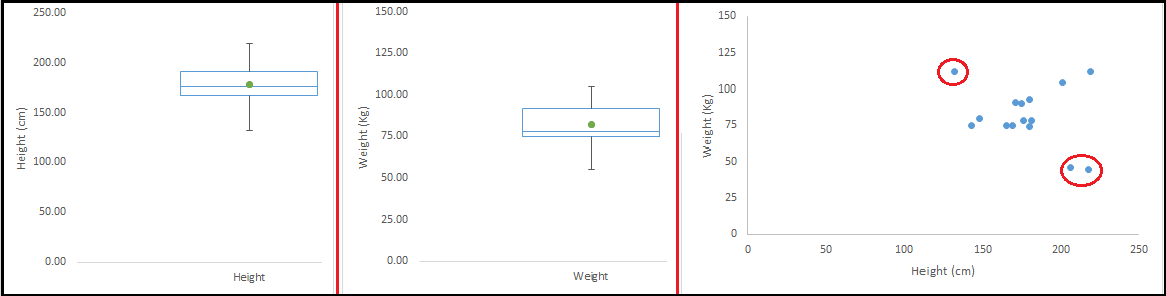

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
- It increases the error variance and reduces the power of statistical tests
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression and other statistical model assumptions.
To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set.


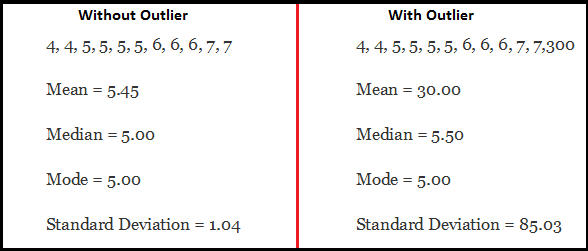

# **Detecting Outliers**

## **Univariate Outliers**

We will be using the Boston House Pricing Dataset which can be found in Scikit-learn datasets


The dataset columns include:
    
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX full-value property-tax rate per 10,000 dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt

Run the code below to import the dataset.

In [3]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


###**Box Plot**

Box plots can be used to show the outliers as dots outside the box.

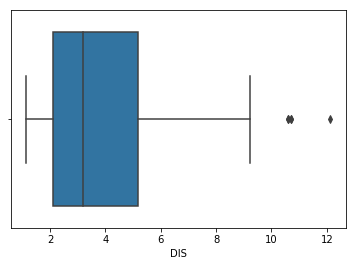

In [4]:
sns.boxplot(x=boston_df['DIS'])

The above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observations i.e no where near the quartiles.


### **Z-Score**

If the distribution is normal, 3 standard deviations from the mean is a common cut-off for identifying outliers.

Z-score can be helpful for this since the z-score for a data point is the number of standard deviations the datapoint is away from the mean. 

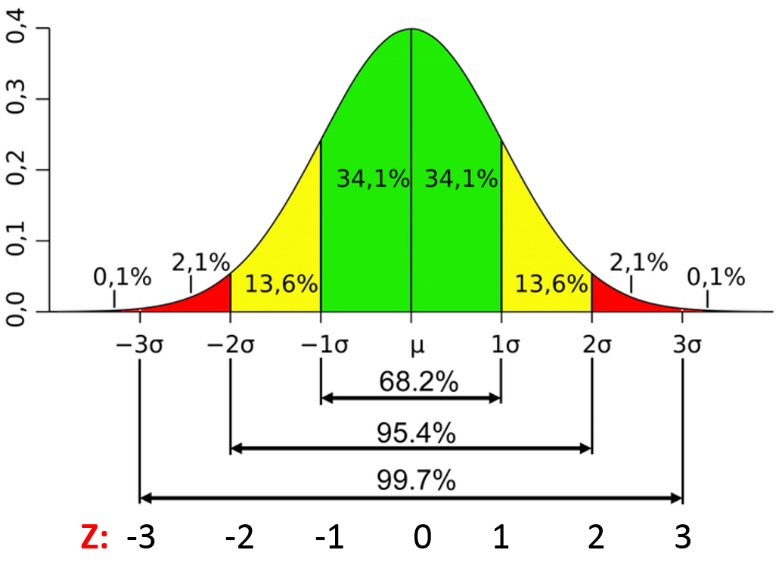


To calculate the Z-score we re-scale and center the data by subtracting the mean and dividing by the standard deviation. Then, we look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
We will use Z-score function defined in scipy library to detect the outliers.

For example, let's remove the outliers from the `RM` column in our dataset. First, we will calculate the z-score for the `RM` column then we can filter the rows so we keep only the rows where the value of `RM` is not considered to be an outlier

/usr/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


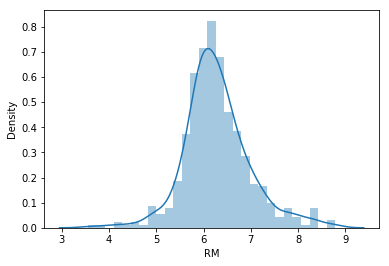

In [5]:
sns.distplot(boston_df["RM"])

In [6]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(boston_df['RM']))
z

array([4.13671889e-01, 1.94274453e-01, 1.28271368e+00, 1.01630251e+00,
       1.22857665e+00, 2.07096381e-01, 3.88410945e-01, 1.60465557e-01,
       9.31205901e-01, 3.99808215e-01, 1.31589471e-01, 3.92684921e-01,
       5.63643963e-01, 4.78164442e-01, 2.68739617e-01, 6.42000190e-01,
       4.98109663e-01, 4.19753436e-01, 1.18052117e+00, 7.94438668e-01,
       1.01811008e+00, 4.55369903e-01, 2.03205317e-01, 6.71918022e-01,
       5.13780909e-01, 9.76794979e-01, 6.71918022e-01, 3.38547892e-01,
       2.99699195e-01, 5.54713098e-01, 8.14383890e-01, 3.02931425e-01,
       4.76739783e-01, 8.31479794e-01, 2.68739617e-01, 5.00958981e-01,
       6.32027579e-01, 6.19205651e-01, 4.53945244e-01, 4.42165063e-01,
       1.05334363e+00, 6.91480331e-01, 1.64739533e-01, 1.04903869e-01,
       3.07205401e-01, 8.58548308e-01, 7.10383806e-01, 3.62767089e-01,
       1.26172671e+00, 9.72521003e-01, 4.58219220e-01, 2.41671102e-01,
       3.22493734e-01, 4.08356167e-01, 5.65068621e-01, 1.37389184e+00,
      

In [7]:
filtered_entries = z < 3
filtered_entries

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [8]:
df_zscore_filter = boston_df[filtered_entries]

In [9]:
print(boston_df.shape)
print(df_zscore_filter.shape)

(506, 13)
(498, 13)


### **Interquartile Range**

Interquartile range (IQR) is the third quartile of data - the first quartile (Q3 - Q1). In order to create the quartiles or percentiles, make sure that your data is in ascending order first and then take the first and third quartiles to calculate the IQR.

 The rule is that any value below **Q1-1.5*IQR** or above **Q3+1.5*IQR** is an outlier.

We will be calculating the IQR for the `DIS` column using the `quantile` method. 

/usr/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


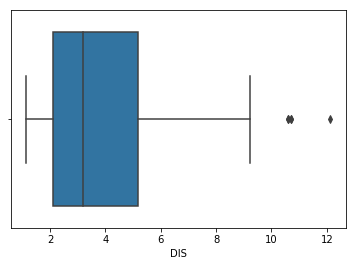

In [10]:
sns.boxplot(boston_df['DIS'])

In [11]:
Q1 = boston_df['DIS'].quantile(0.25)
Q3 = boston_df['DIS'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3.0882500000000004


In [12]:
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper =  Q3 + cut_off
print(lower,upper)

-2.5322000000000005 9.820800000000002


In [13]:
df1 = boston_df[boston_df['DIS']> upper]
df2 = boston_df[boston_df['DIS'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Total number of outliers are 5


In [14]:
boston_df.shape

(506, 13)

Now that we have the upper and lower limits, we can remove the outliers by only keeping the values that lie within the lower and upper limits.

In [15]:
df_new = boston_df[(boston_df['DIS'] < upper) & (boston_df['DIS'] > lower)]
df_new.shape

(501, 13)

## **Multivariate Outliers**

### **Scatter Plot**

If we take a look at a scatter plot, we can detect outliers by seeing the points that are away from the majority of the data points. 

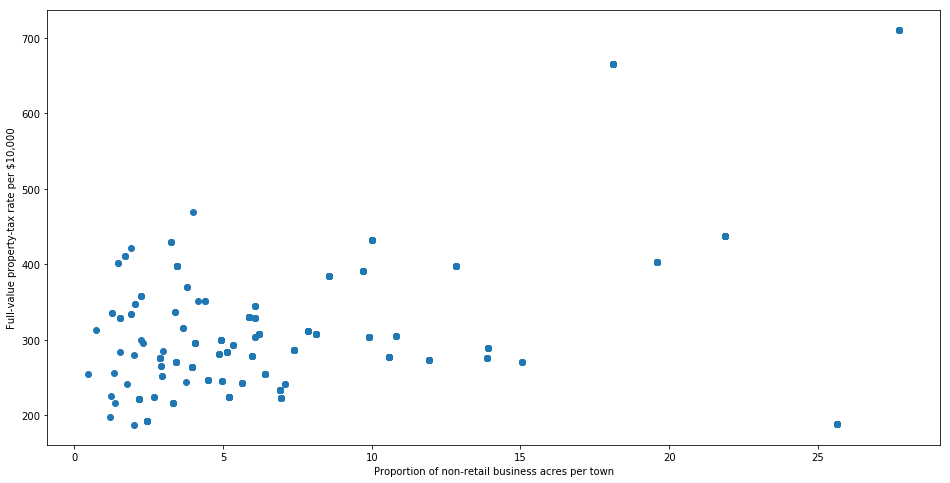

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

### **Local Outlier Factor**

The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers. 



This is useful because not all methods will not identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) if that whole region is not an outlying region in the global space of data points.
A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors. In the below feature space, LOF is able to identify P1 and P2 as outliers, which are local outliers to Cluster 2 (in addition to P3)


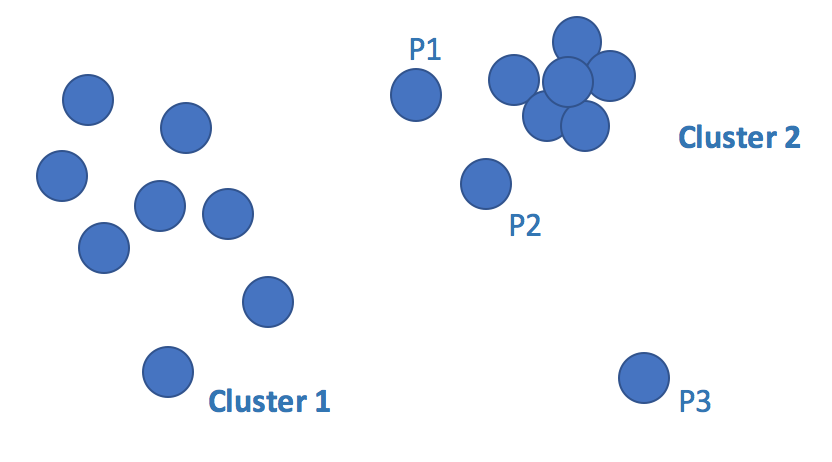

The scikit-learn library provides an implementation of this approach in the LocalOutlierFactor class.

In [7]:
df_heart = pd.read_csv('./heart.csv')

I'll consider the 'age' and 'chol' of the heart diseases dataset for the multivariate analysis

In [8]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
X = df_heart[['age','chol']].values
y_pred = clf.fit_predict(X)

Now let's plot and visualize the outliers. I've set blue for the normal records and red for outliers

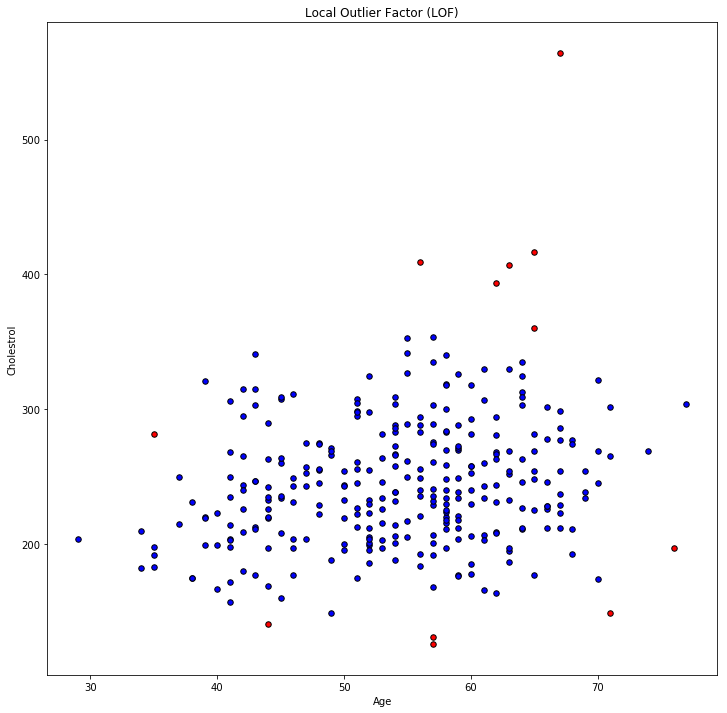

In [9]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

### **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** 

This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance

Two important parameters are required for DBSCAN: epsilon (“eps”) and minimum points (“MinPts”). The parameter eps defines the radius of neighborhood around a point x. It's called the ϵ-neighborhood of x. The parameter MinPts is the minimum number of neighbors within “eps” radius.

Choosing `MinPts` and `Eps`:
eps: 

1.  **MinPts**: As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set. However, larger values are usually better for data sets with noise and will yield more significant clusters. 


2.  **eps**: if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable. 



In [21]:
X = df_heart[['age','chol']].values

In [22]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=14)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

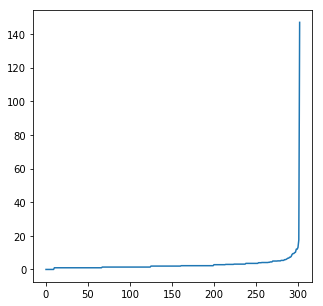

In [23]:
plt.figure(figsize=(5,5))

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15, min_samples=3).fit(X)
labels = db.labels_
pd.Series(labels).value_counts()

 0    295
-1      4
 1      4
dtype: int64

Here the -1's represent the outliers!

Let's plot to differentiate the outliers. I'll set the blue colour to normal records and red colour to outliers.¶


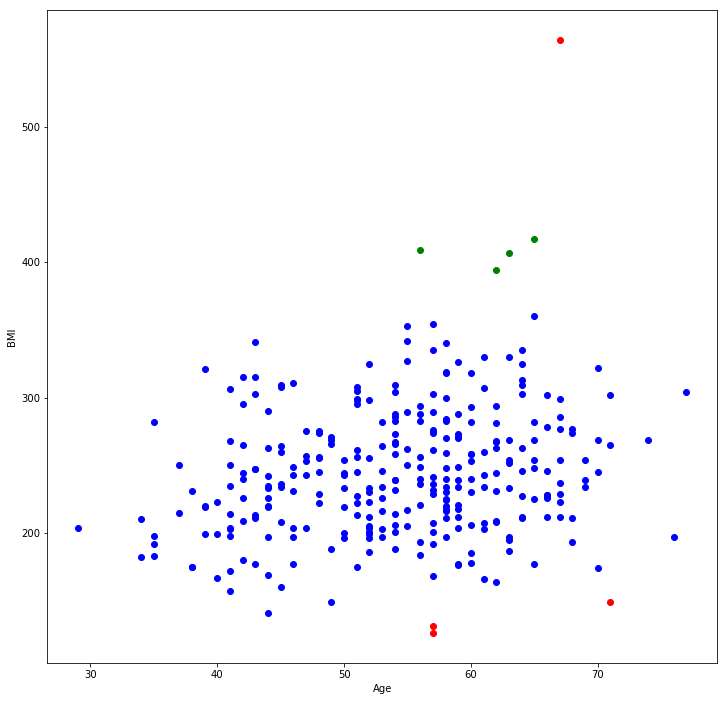

In [25]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue','green','red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Age');
plt.ylabel('BMI');

# **Outliers Exercise 1**

Use the following outlier methods on the following dataset: ./heart.csv


### Using the appropriate univariate outlier detection method on the 'chol' column:

In [ ]:
#Your solution here

### Using LOF on the 'chol' and 'age' columns:

In [ ]:
#Your solution here

#**Outliers Exercise 2**

Using the insurance dataset(./insurance.csv) find the number of outliers in the charges column using the appropriate method.

In [ ]:
#Your code here

#References

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

https://www.kaggle.com/rpsuraj/outlier-detection-techniques-simplified

https://medium.com/@agarwalvibhor84/lets-cluster-data-points-using-dbscan-278c5459bee5